# Predicting student population

## Import libraries

In [44]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Load student data

In [45]:
students = pd.read_csv('Data/students.csv')
semester_split = students.Semester.str.split()
students['Term'] = [semester_split[i][0] for i in range(len(students))]
students['Year'] = [semester_split[i][1] for i in range(len(students))]

students.head()

,Semester,Total_enrollment,Male,Female,Undergrad,Postbac,Master,Doctoral,Professional,Age_Undergrad_Male,...,Pharm_Male,Pharm_Female,White,Hispanic,Asian_American,African_American,International,Others,Term,Year
0,Spring 2014,37538,18917,18621,28535,1234,4190,2039,1540,23.4,...,163,278,11478,9686,7338,3889,3724,1423,Spring,2014
1,Summer 2014,14797,7198,7599,10463,580,1803,1233,718,24.1,...,92,152,4625,3590,2915,1486,1611,570,Summer,2014
2,Fall 2014,40914,20730,20184,31722,1325,4111,2179,1577,23.1,...,166,293,11855,10994,8215,4173,4025,1652,Fall,2014
3,Spring 2015,39032,19774,19258,30080,1347,3936,2136,1533,23.3,...,166,290,11211,10530,7956,3885,3860,1590,Spring,2015
4,Summer 2015,14216,6747,7469,10915,564,1629,460,648,23.8,...,80,152,4444,3818,2989,1390,964,611,Summer,2015


In [46]:
students.Year = students.Year.astype(float)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Semester               33 non-null     object 
 1   Total_enrollment       33 non-null     int64  
 2   Male                   33 non-null     int64  
 3   Female                 33 non-null     int64  
 4   Undergrad              33 non-null     int64  
 5   Postbac                33 non-null     int64  
 6   Master                 33 non-null     int64  
 7   Doctoral               33 non-null     int64  
 8   Professional           33 non-null     int64  
 9   Age_Undergrad_Male     33 non-null     float64
 10  Age_Undergrad_Female   33 non-null     float64
 11  Age_Postbac_Male       33 non-null     float64
 12  Age_Postbac_Female     33 non-null     float64
 13  Age_Master_Male        33 non-null     float64
 14  Age_Master_Female      33 non-null     float64
 15  Age_Doct

In [47]:
students_spring = students[students.Term == 'Spring'].copy()
students_fall = students[students.Term == 'Fall'].copy()
students_summer = students[students.Term == 'Summer'].copy()

In [48]:
l = ['Male', 'Female']
'Female' in l or 'female' in l

True

In [49]:
colors = ['r', 'g', 'b', 'c', 'm']


def student_prediction(semester: str, deg: int, col: list):
    if semester == 'Spring':
        df = students_spring
    elif semester == 'Summer':
        df = students_summer
    elif semester == 'Fall':
        df = students_fall
    else:
        print('Invalid semester')

    if 'Male' in col:
        group = 'Gender'
    elif 'White' in col:
        group = 'Race'
    else:
        group = 'Undergrad'

    prediction = {}
    plt.figure(figsize=(13, 7))
    for c in col:
        idx = col.index(c)
        p = np.poly1d(np.polyfit(df.Year, df[c], deg))
        x_new = np.linspace(2014, 2024)
        y_new = p(x_new) 
        prediction[c] = p([2025, 2026, 2027])
        plt.plot(df.Year, df[c], color = colors[idx], label = c)
        plt.plot(x_new, y_new, linestyle = '--', color = colors[idx], label = c + ' Prediction')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Population', fontsize=15)
    plt.title('Semester: ' + semester, fontsize=25)
    plt.legend(fontsize = 15)
    n = semester + '_' + group + '_prediction' 
    filename = f"Figure/{n}.jpg"
    plt.tick_params(axis='both', labelsize=14)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  
    
    return prediction

## Prediction - Spring semester (2025 - 2027)

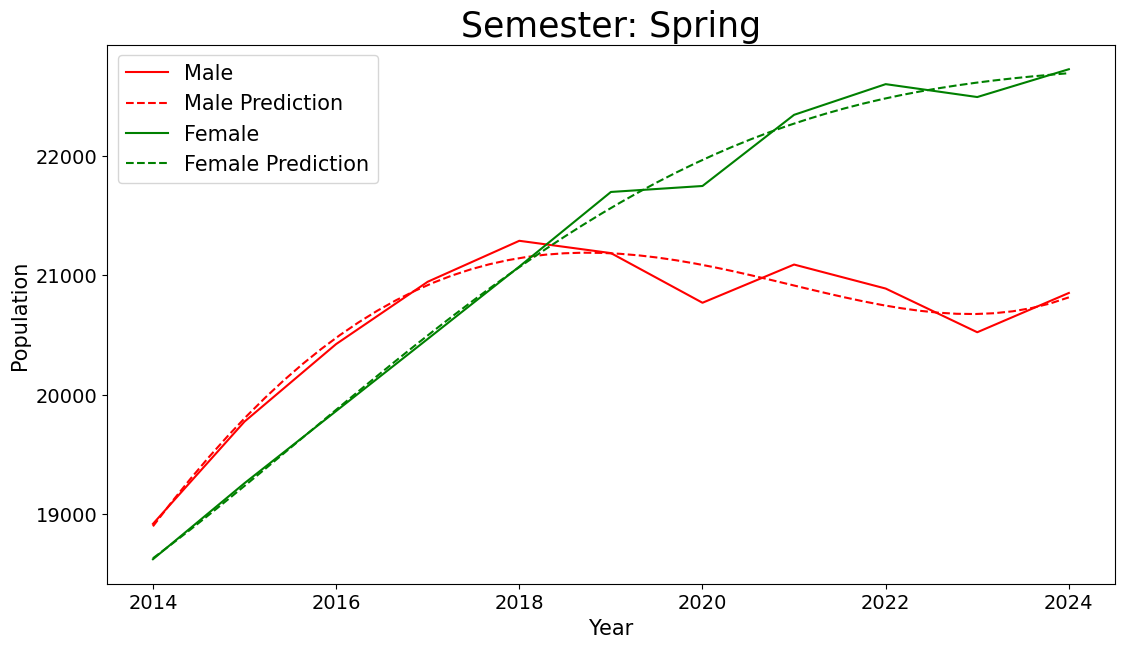

{'Male': array([21289.46484375, 22242.82226562, 23832.63085938]),
 'Female': array([22751.51660156, 22837.71289062, 23005.76269531])}

In [50]:
# Gender
student_prediction('Spring', 4, ['Male', 'Female'])

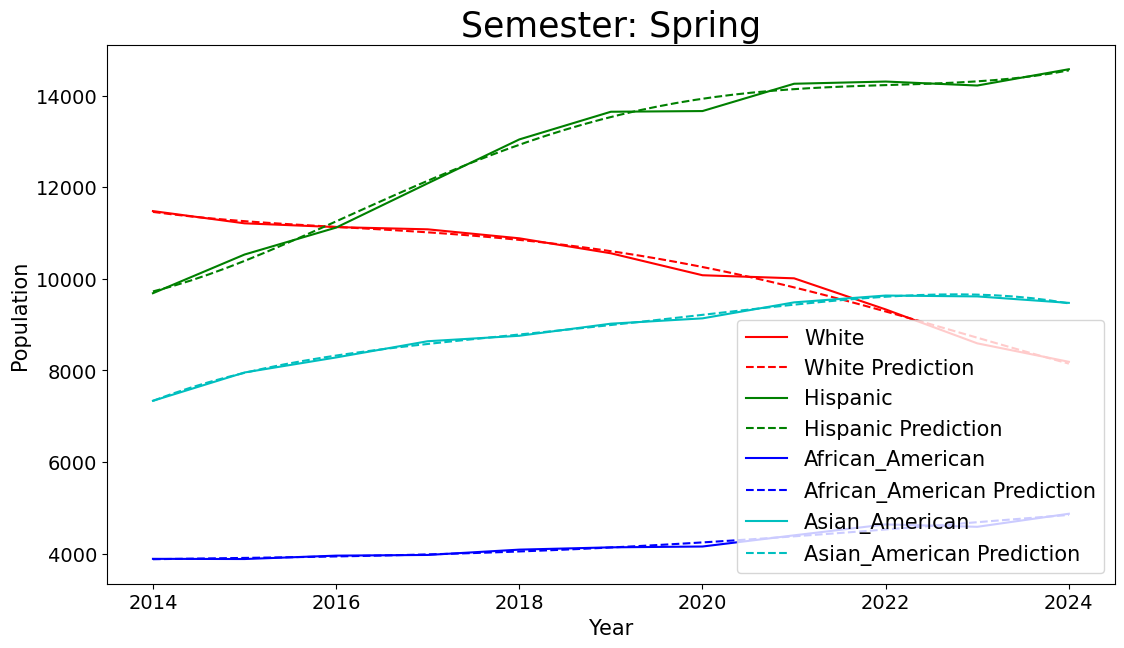

{'White': array([7660.3359375 , 7336.35546875, 7282.89453125]),
 'Hispanic': array([15156.9453125 , 16393.73046875, 18566.875     ]),
 'African_American': array([4990.37670898, 5103.64135742, 5167.60839844]),
 'Asian_American': array([8893.1015625 , 7770.01953125, 5889.96875   ])}

In [51]:
# Race
student_prediction('Spring', 4, ['White', 'Hispanic', 'African_American', 'Asian_American'])

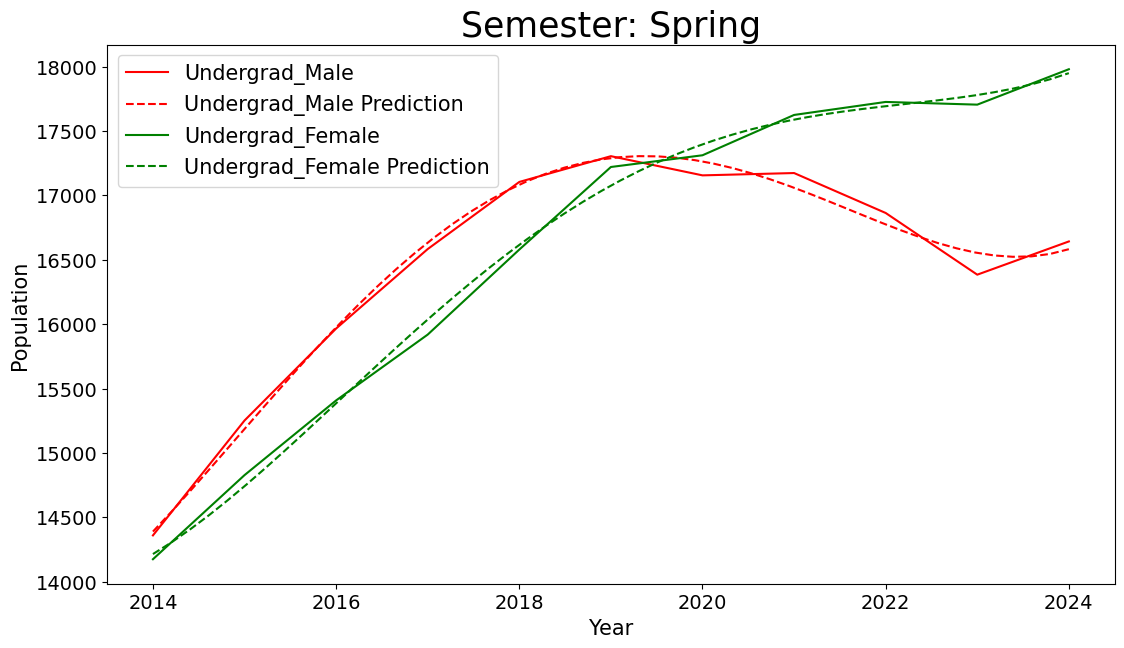

{'Undergrad_Male': array([17092.05859375, 18359.06640625, 20702.7109375 ]),
 'Undergrad_Female': array([18331.703125  , 19088.2421875 , 20408.11328125])}

In [52]:
# Undergraduate Group
student_prediction('Spring', 4, ['Undergrad_Male', 'Undergrad_Female'])

## Prediction - Fall semester (2025 - 2027)

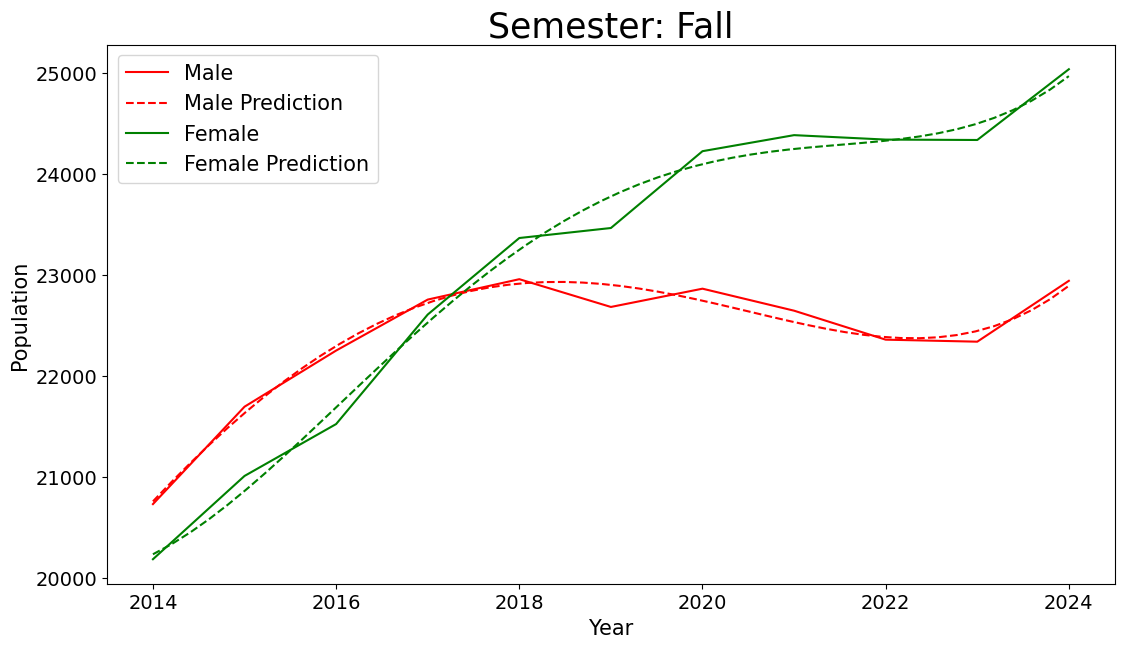

{'Male': array([23931.125     , 25795.546875  , 28748.93359375]),
 'Female': array([26013.71875  , 27960.2265625, 31196.21875  ])}

In [53]:
# Gender
student_prediction('Fall', 4, ['Male', 'Female'])

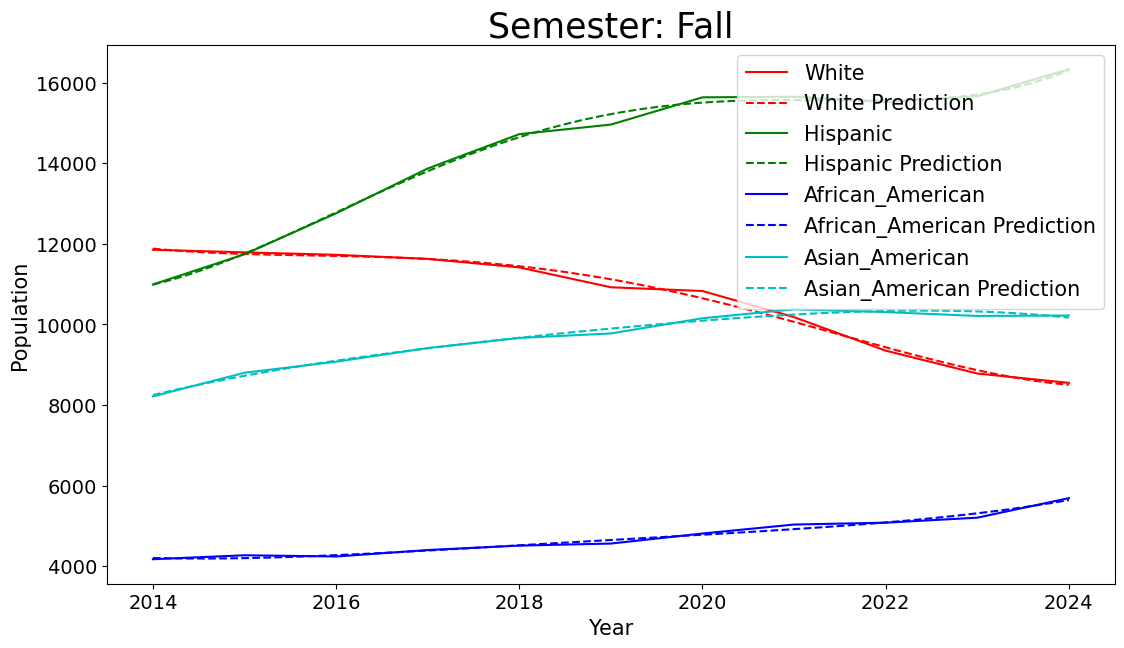

{'White': array([ 8521.4765625,  9141.59375  , 10614.4375   ]),
 'Hispanic': array([17771.3671875, 20547.8984375, 25194.6640625]),
 'African_American': array([6127.515625  , 6836.03417969, 7844.31152344]),
 'Asian_American': array([9819.47460938, 9204.43457031, 8247.47460938])}

In [54]:
# Race
student_prediction('Fall', 4, ['White', 'Hispanic', 'African_American', 'Asian_American'])

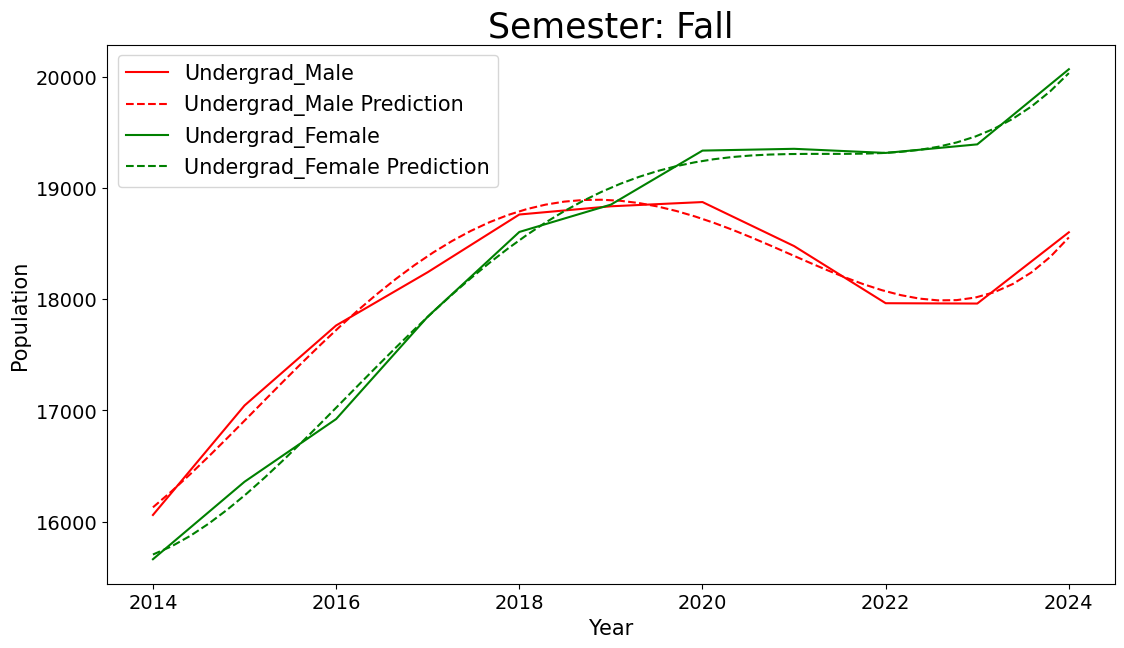

{'Undergrad_Male': array([20080.03125  , 23059.2109375, 28036.5390625]),
 'Undergrad_Female': array([21346.7265625, 23815.1640625, 27919.3203125])}

In [55]:
# Undergraduate group
student_prediction('Fall', 4, ['Undergrad_Male', 'Undergrad_Female'])

## International student data

In [56]:
international = pd.read_csv('Data/international_students.csv')
international['Term'] = [semester_split[i][0] for i in range(len(international))]
international['Year'] = [semester_split[i][1] for i in range(len(international))]

international.head()

,Semester,China,India,Vietnam,Nigeria,Saudi_Arabia,South_Korea,Iran,Mexico,Venezuela,...,Taiwan,Turkey,Peru,Pakistan,Nepal,Ukraine,Bangladesh,Sri_Lanka,Term,Year
0,Spring 2014,897,791,340,131,100.0,114.0,101.0,102.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,2014
1,Summer 2014,469,290,78,46,49.0,56.0,74.0,NaN,NaN,...,46.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2014
2,Fall 2014,934,917,320,149,138.0,131.0,124.0,101.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,2014
3,Spring 2015,837,917,306,154,141.0,119.0,140.0,94.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,2015
4,Summer 2015,187,191,49,49,91.0,21.0,NaN,29.0,24.0,...,NaN,NaN,24.0,24.0,NaN,NaN,NaN,NaN,Summer,2015


In [57]:
# Dropping NA column
international = international.dropna(axis=1)
international.head()

,Semester,China,India,Vietnam,Nigeria,Term,Year
0,Spring 2014,897,791,340,131,Spring,2014
1,Summer 2014,469,290,78,46,Summer,2014
2,Fall 2014,934,917,320,149,Fall,2014
3,Spring 2015,837,917,306,154,Spring,2015
4,Summer 2015,187,191,49,49,Summer,2015


In [58]:
international.Year = international.Year.astype(float)
international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Semester  33 non-null     object 
 1   China     33 non-null     int64  
 2   India     33 non-null     int64  
 3   Vietnam   33 non-null     int64  
 4   Nigeria   33 non-null     int64  
 5   Term      33 non-null     object 
 6   Year      33 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.9+ KB


In [59]:
international_spring = international[international['Term'] == 'Spring'].copy()
international_summer = international[international['Term'] == 'Summer'].copy()
international_fall = international[international['Term'] == 'Fall'].copy()

In [60]:
def international_prediction(semester: str, deg: int, col: list):
    if semester == 'Spring':
        df = international_spring
    elif semester == 'Summer':
        df = international_summer
    elif semester == 'Fall':
        df = international_fall
    else:
        print('Invalid semester')

    prediction = {}
    plt.figure(figsize=(15, 10))
    for c in col:
        idx = col.index(c)
        p = np.poly1d(np.polyfit(df.Year, df[c], deg))
        x_new = np.linspace(2014, 2024)
        y_new = p(x_new) 
        prediction[c] = p([2025, 2026, 2027])
        plt.plot(df.Year, df[c], color = colors[idx], label = c)
        plt.plot(x_new, y_new, linestyle = '--', color = colors[idx], label = c + ' Prediction')
    n = semester + '_Country_prediction' 
    filename = f"Figure/{n}.jpg"
    plt.savefig(filename, bbox_inches='tight')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Population', fontsize=15)
    plt.title('Semester: ' + semester, fontsize=20)
    plt.legend(fontsize = 15)
    plt.tick_params(axis='both', labelsize=14)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  
    
    return prediction

## Prediction - Spring semester (2025 - 2027)

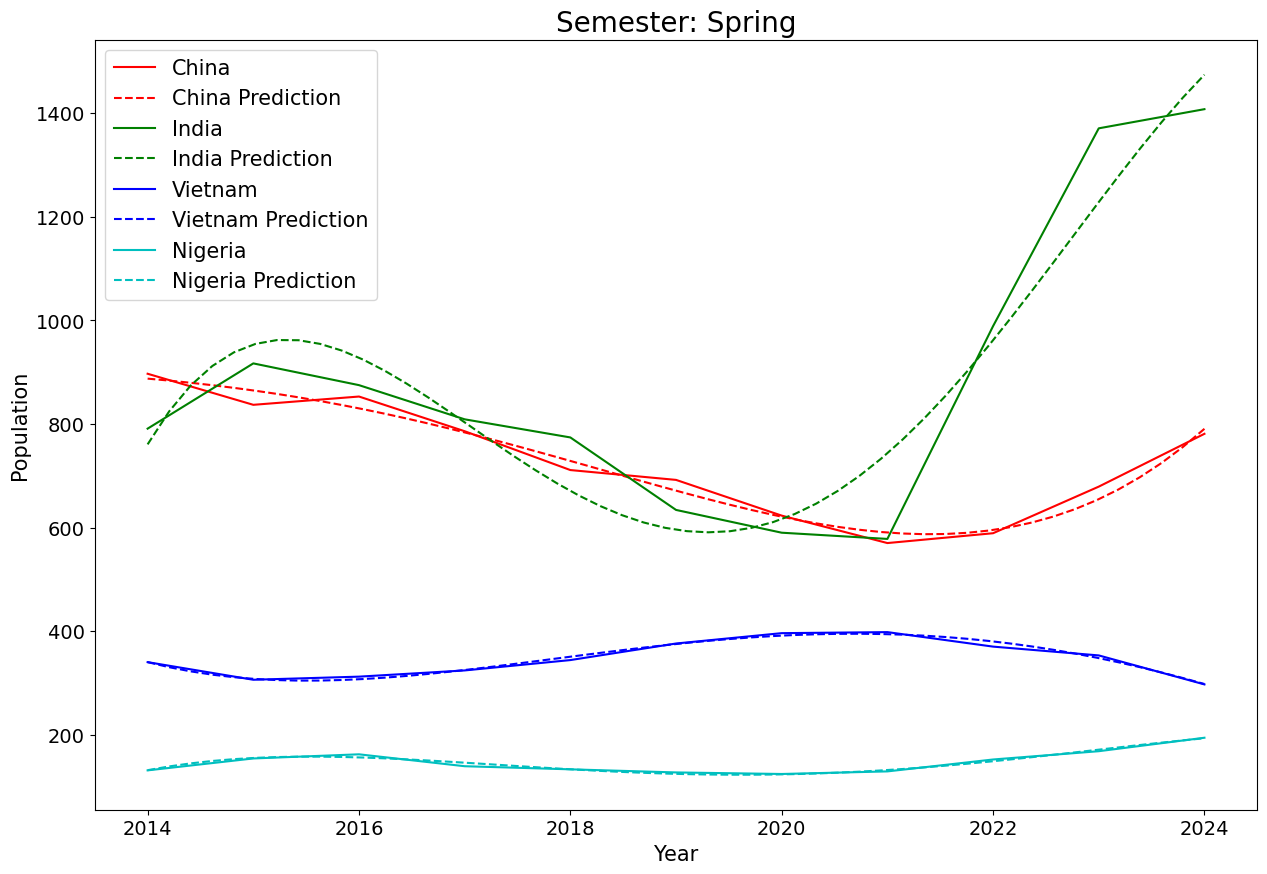

{'China': array([1028.48608398, 1396.57958984, 1926.53417969]),
 'India': array([1603.2734375, 1491.609375 ,  989.4453125]),
 'Vietnam': array([232.36206055, 155.75390625,  74.07788086]),
 'Nigeria': array([206.72705078, 201.63891602, 164.89672852])}

In [61]:
international_prediction('Spring', 4, ['China', 'India', 'Vietnam', 'Nigeria'])

## Prediction - Fall semester (2025 - 2027)

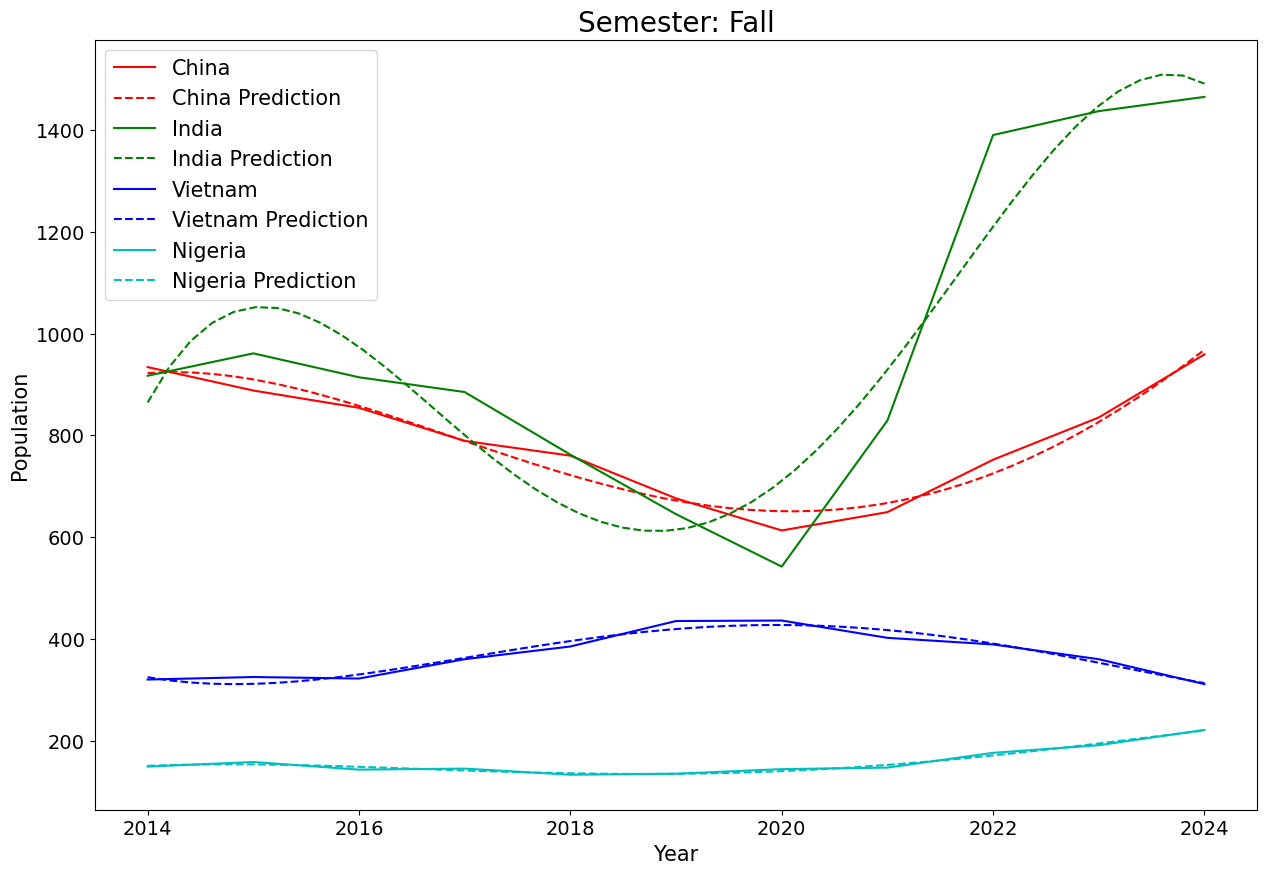

{'China': array([1144.51904297, 1346.43847656, 1560.70361328]),
 'India': array([ 1142.05078125,   157.8671875 , -1750.3984375 ]),
 'Vietnam': array([283.60595703, 281.38720703, 326.76025391]),
 'Nigeria': array([243.72741699, 260.60681152, 264.48132324])}

In [62]:
international_prediction('Fall', 4, ['China', 'India', 'Vietnam', 'Nigeria'])

## Load faculty data

In [63]:
faculty = pd.read_csv('Data/faculty.csv')
faculty.head()

,Year,Total_faculty,Male,Female,African_American,Asian_American,Hispanic,White
0,2014,2316,1411,905,109,296,185,1566
1,2015,2554,1567,987,109,325,192,1761
2,2016,2617,1599,1018,117,337,203,1772
3,2017,2685,1629,1056,136,347,211,1763
4,2018,2757,1656,1101,154,353,227,1787


In [64]:
colors = ['r', 'g', 'b', 'c', 'm']


def faculty_prediction(deg: int, col: list):

    if 'Male' in col:
        group = 'Gender'
    elif 'Hispanic' in col:
        group = 'Race'
    else:
        group = 'White'

    prediction = {}
    plt.figure(figsize=(13, 7))


    for c in col:
        idx = col.index(c)
        p = np.poly1d(np.polyfit(faculty.Year, faculty[c], deg))
        x_new = np.linspace(2014, 2024)
        y_new = p(x_new) 
        prediction[c] = p([2025, 2026, 2027])
        plt.plot(faculty.Year, faculty[c], color = colors[idx], label = c)
        plt.plot(x_new, y_new, linestyle = '--', color = colors[idx], label = c + ' Prediction')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Population', fontsize=15)
    plt.title(group, fontsize=25)
    plt.legend(fontsize = 15)
    n = 'faculty_' + group + '_prediction' 
    filename = f"Figure/{n}.jpg"
    plt.tick_params(axis='both', labelsize=14)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  
    
    return prediction

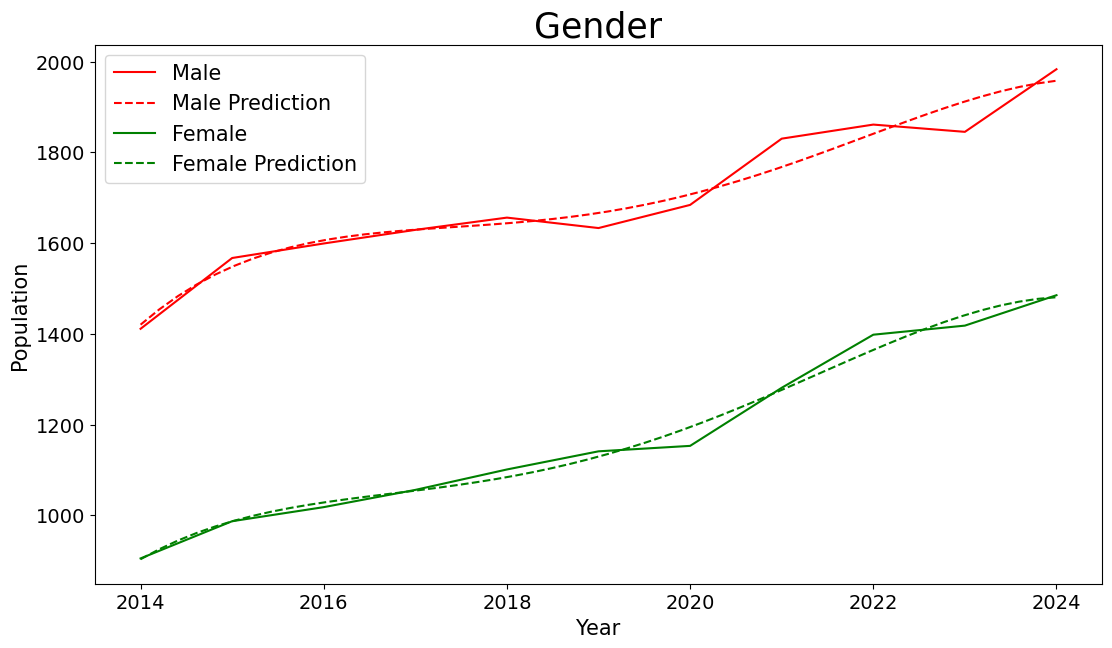

{'Male': array([1946.93554688, 1840.1796875 , 1589.76660156]),
 'Female': array([1450.44726562, 1310.484375  , 1013.08886719])}

In [65]:
faculty_prediction(4, ['Male', 'Female'])

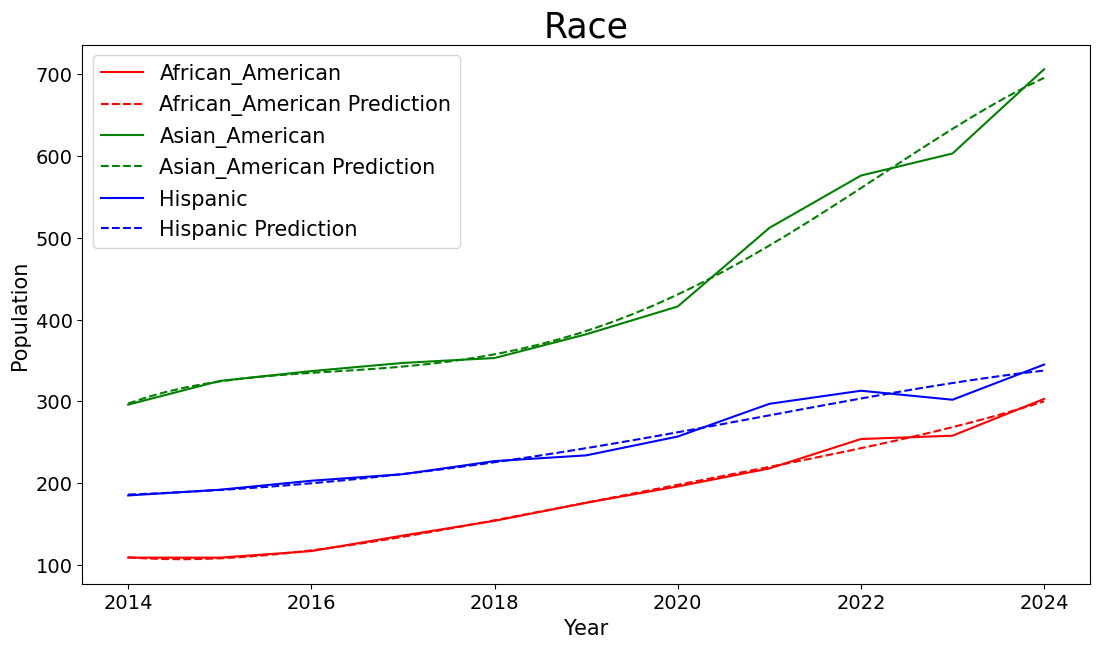

{'African_American': array([341.21362305, 397.1229248 , 473.69689941]),
 'Asian_American': array([732.24462891, 723.97509766, 647.62597656]),
 'Hispanic': array([347.00061035, 347.72976685, 336.90060425])}

In [66]:
faculty_prediction(4, ['African_American', 'Asian_American', 'Hispanic'])

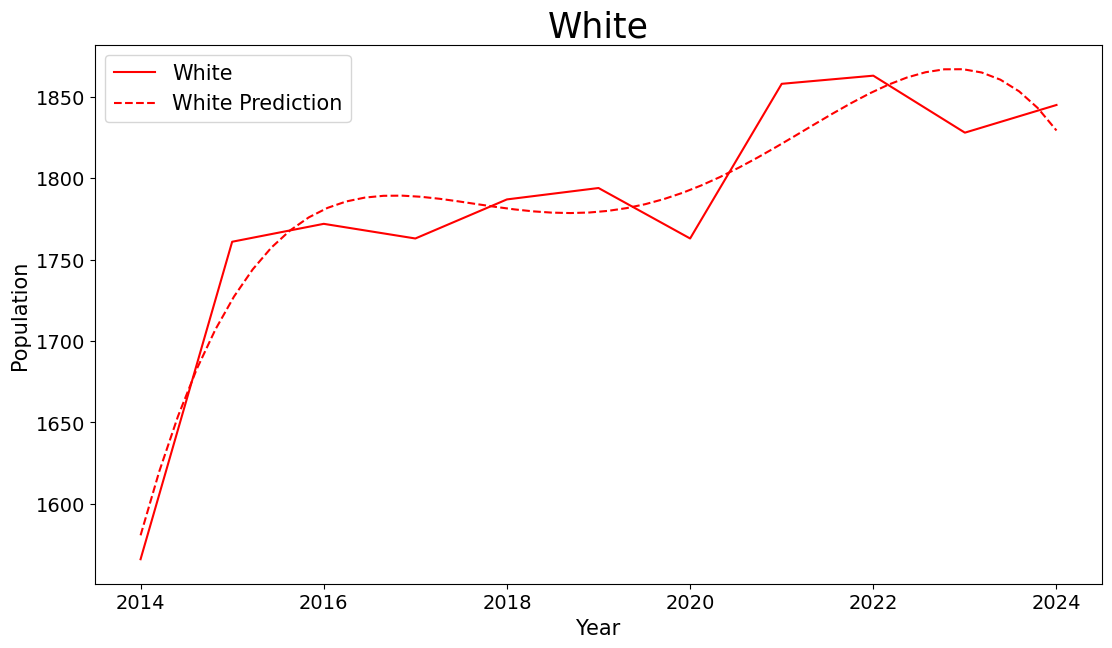

{'White': array([1697.15429688, 1416.06347656,  921.09667969])}

In [67]:
faculty_prediction(4, ['White'])

`Polyfit` cannot accurately predict the White faculty population. Therefore, we decided to base the prediction for the White population on the average of the previous three years.

In [68]:
temp = list(faculty.iloc[-3:].White)
prediction = {}
prediction['White'] = []

for i in range(3):
    pred = np.mean(temp)
    temp[0] = temp[1]
    temp[1] = temp[2]
    temp[2] = pred
    prediction['White'].append(pred)

prediction

{'White': [1845.3333333333333, 1839.4444444444443, 1843.2592592592591]}

## Predicting Alcohol consumers

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# --- Predicted undergraduate populations by race (Spring & Fall) ---
spring_race_population = {
    "White": np.array([7660.34, 7336.36, 7282.89]),
    "Hispanic": np.array([15156.95, 16393.73, 18566.88]),
    "African_American": np.array([4990.38, 5103.64, 5167.61]),
    "Asian_American": np.array([8893.10, 7770.02, 5889.97])
}

fall_race_population = {
    "White": np.array([8521.48, 9141.59, 10614.44]),
    "Hispanic": np.array([17771.37, 20547.90, 25194.66]),
    "African_American": np.array([6127.52, 6836.03, 7844.31]),
    "Asian_American": np.array([9819.47, 9204.43, 8247.47])
}

# --- Predicted male/female student populations ---
spring_gender_population = {
    "Undergrad_Male": np.array([17092.06, 18359.07, 20702.71]),
    "Undergrad_Female": np.array([18331.70, 19088.24, 20408.11])
}

fall_gender_population = {
    "Undergrad_Male": np.array([20080.03, 23059.21, 28036.54]),
    "Undergrad_Female": np.array([21346.73, 23815.16, 27919.32])
}

# --- Gender ratios ---
spring_male_ratio = spring_gender_population["Undergrad_Male"] / (
    spring_gender_population["Undergrad_Male"] + spring_gender_population["Undergrad_Female"])
spring_female_ratio = 1 - spring_male_ratio

fall_male_ratio = fall_gender_population["Undergrad_Male"] / (
    fall_gender_population["Undergrad_Male"] + fall_gender_population["Undergrad_Female"])
fall_female_ratio = 1 - fall_male_ratio

# --- Drinking probabilities by race and gender ---
drinking_probs = {
    "White": {"Male": 0.68, "Female": 0.68},
    "Hispanic": {"Male": 0.60, "Female": 0.57},
    "African_American": {"Male": 0.52, "Female": 0.48},
    "Asian_American": {"Male": 0.318, "Female": 0.318}
}

# --- Adjust race population by gender ratio ---
def adjust_population_by_gender(race_data, male_ratio, female_ratio):
    return {
        race: {
            "Male": race_data[race] * male_ratio,
            "Female": race_data[race] * female_ratio
        }
        for race in race_data
    }

# --- Estimate drinkers from population × probability ---
def estimate_drinkers(population, probs):
    total = 0
    for race, genders in population.items():
        for gender, values in genders.items():
            total += np.sum(values * probs[race][gender])
    return int(total)

# --- Adjusted populations (students) ---
spring_adjusted_population = adjust_population_by_gender(spring_race_population, spring_male_ratio, spring_female_ratio)
fall_adjusted_population = adjust_population_by_gender(fall_race_population, fall_male_ratio, fall_female_ratio)

# --- Faculty predictions ---
faculty_population = {
    "White": {
        "Male": np.array([0.68 * 1845, 0.68 * 1839, 0.68 * 1843]),
        "Female": np.array([0.68 * 1845, 0.68 * 1839, 0.68 * 1843])
    },
    "Hispanic": {
        "Male": np.array([0.60 * 347, 0.60 * 348, 0.60 * 337]),
        "Female": np.array([0.57 * 347, 0.57 * 348, 0.57 * 337])
    },
    "African_American": {
        "Male": np.array([0.52 * 341, 0.52 * 397, 0.52 * 474]),
        "Female": np.array([0.48 * 341, 0.48 * 397, 0.48 * 474])
    },
    "Asian_American": {
        "Male": np.array([0.318 * 732, 0.318 * 724, 0.318 * 648]),
        "Female": np.array([0.318 * 732, 0.318 * 724, 0.318 * 648])
    }
}

# --- Final predictions (student + faculty combined) ---
spring_total_drinkers, fall_total_drinkers = [], []
for i in range(3):
    spring_students = {race: {g: spring_adjusted_population[race][g][i] for g in ["Male", "Female"]}
                       for race in spring_adjusted_population}
    fall_students = {race: {g: fall_adjusted_population[race][g][i] for g in ["Male", "Female"]}
                     for race in fall_adjusted_population}
    
    spring_total = estimate_drinkers(spring_students, drinking_probs)
    fall_total = estimate_drinkers(fall_students, drinking_probs)

    for race in faculty_population:
        for gender in faculty_population[race]:
            spring_total += faculty_population[race][gender][i]
            fall_total += faculty_population[race][gender][i]

    spring_total_drinkers.append(int(spring_total))
    fall_total_drinkers.append(int(fall_total))

# --- Final output ---
print("✅ Spring Estimated Drinkers (2025–2027):", spring_total_drinkers)
print("✅ Fall Estimated Drinkers (2025–2027):", fall_total_drinkers)


✅ Spring Estimated Drinkers (2025–2027): [23108, 23359, 24059]
✅ Fall Estimated Drinkers (2025–2027): [26086, 28339, 32288]


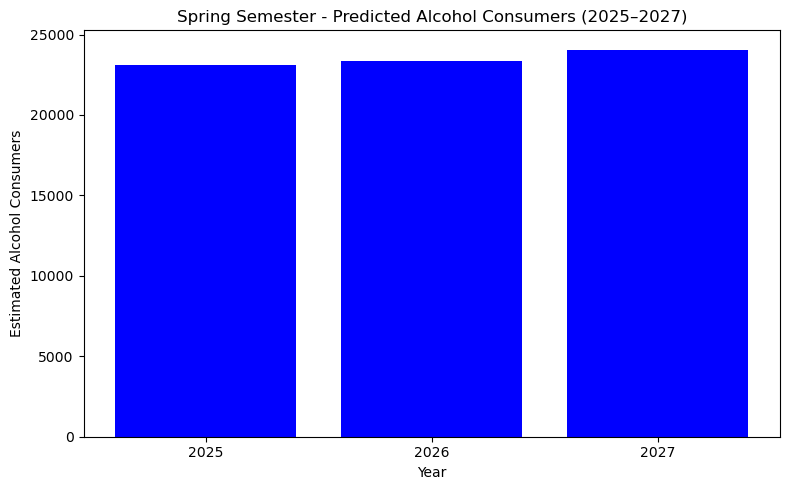

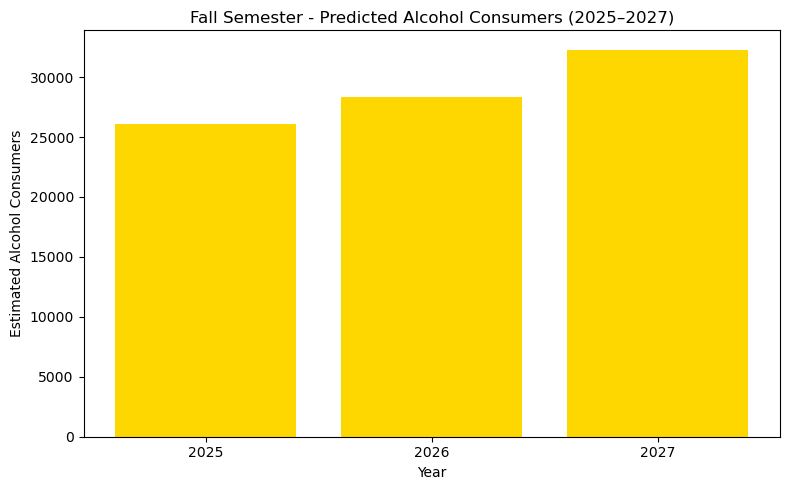

In [75]:
import matplotlib.pyplot as plt

# Years and estimated drinkers
years = ["2025", "2026", "2027"]
spring_total_drinkers = [23108, 23359, 24059]
fall_total_drinkers = [26086, 28339, 32288]

# --- Spring Chart (Blue) ---
plt.figure(figsize=(8, 5))
plt.bar(years, spring_total_drinkers, color='blue')
plt.xlabel("Year")
plt.ylabel("Estimated Alcohol Consumers")
plt.title("Spring Semester - Predicted Alcohol Consumers (2025–2027)")
plt.tight_layout()
plt.savefig("Figure/spring_consumers.jpg")
plt.show()

# --- Fall Chart (Yellow) ---
plt.figure(figsize=(8, 5))
plt.bar(years, fall_total_drinkers, color='gold')
plt.xlabel("Year")
plt.ylabel("Estimated Alcohol Consumers")
plt.title("Fall Semester - Predicted Alcohol Consumers (2025–2027)")
plt.tight_layout()
plt.savefig("Figure/fall_consumers.jpg")
plt.show()


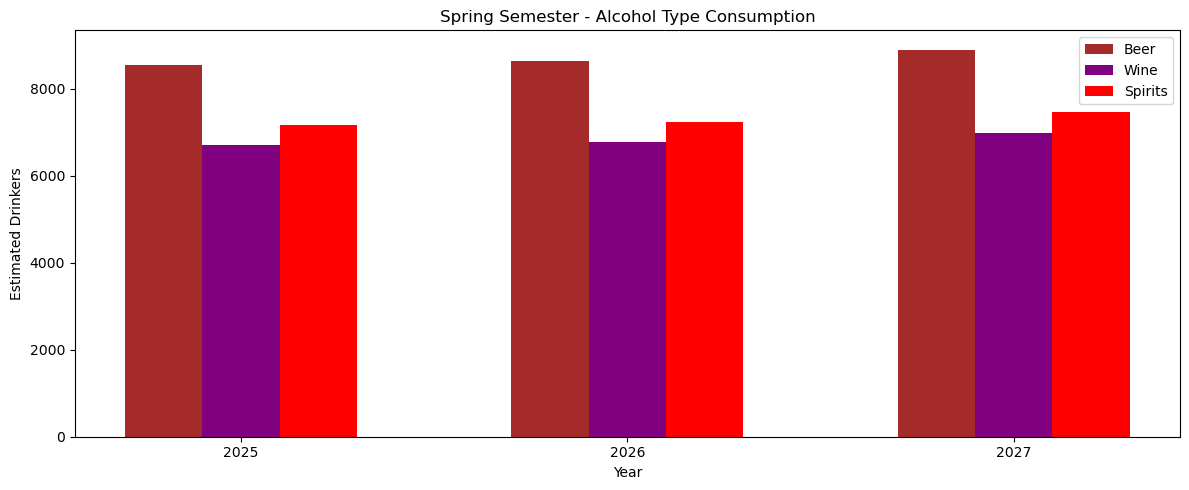

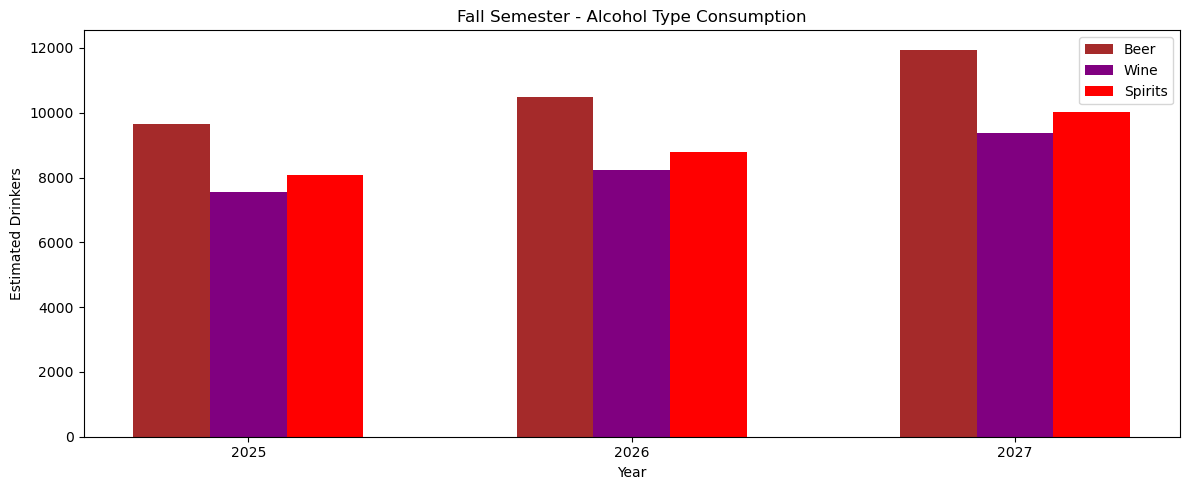

In [71]:
# Drink preferences (from Gallup or NIAAA)
drink_prefs = {"Beer": 0.37, "Wine": 0.29, "Spirits": 0.31}

# Split drinkers by type of alcohol
spring_drinkers_split = {drink: [int(p * total) for total in spring_total_drinkers] for drink, p in drink_prefs.items()}
fall_drinkers_split = {drink: [int(p * total) for total in fall_total_drinkers] for drink, p in drink_prefs.items()}

# Plot for Spring Semester
plt.figure(figsize=(12, 5))
x = np.arange(len(spring_total_drinkers))
width = 0.2

plt.bar(x - width, spring_drinkers_split["Beer"], width, label="Beer", color='brown')
plt.bar(x, spring_drinkers_split["Wine"], width, label="Wine", color='purple')
plt.bar(x + width, spring_drinkers_split["Spirits"], width, label="Spirits", color='red')

plt.xticks(ticks=x, labels=["2025", "2026", "2027"])
plt.xlabel("Year")
plt.ylabel("Estimated Drinkers")
plt.title("Spring Semester - Alcohol Type Consumption")
plt.legend()
plt.tight_layout()
plt.savefig("Figure/spring_preference.jpg", bbox_inches='tight')
plt.show()

# Plot for Fall Semester
plt.figure(figsize=(12, 5))

plt.bar(x - width, fall_drinkers_split["Beer"], width, label="Beer", color='brown')
plt.bar(x, fall_drinkers_split["Wine"], width, label="Wine", color='purple')
plt.bar(x + width, fall_drinkers_split["Spirits"], width, label="Spirits", color='red')

plt.xticks(ticks=x, labels=["2025", "2026", "2027"])
plt.xlabel("Year")
plt.ylabel("Estimated Drinkers")
plt.title("Fall Semester - Alcohol Type Consumption")
plt.legend()
plt.tight_layout()
plt.savefig("Figure/fall_preference.jpg", bbox_inches='tight')
plt.show()